In [23]:
import sys,os
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
import pandas as pd
import numpy as np
import scipy

In [2]:
#print(os.uname()[4])
sys.version

'3.4.3 |Anaconda 2.3.0 (64-bit)| (default, Mar  6 2015, 12:06:10) [MSC v.1600 64 bit (AMD64)]'

In [3]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [4]:
strategyname = 'strategy_270225'
d, info = matlab.loaddata('../mat/'+strategyname+'.mat')

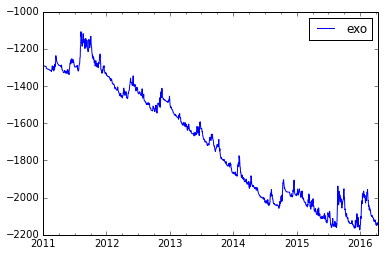

In [5]:
d.plot()


In [6]:
info

{'legs': 4,
 'name': 'BearishCollarBrokenWing',
 'pcf': array([1, 2, 0, 1], dtype=uint8),
 'pcfqty': array([-1, -1,  1,  1], dtype=int16),
 'tickincrement': 0.25,
 'tickvalue': 12.5,
 'underlying': 'EP'}

<h1>Simple entry and exit rules based on MA crossing</h1>

In [7]:
slow_ma = pd.rolling_mean(d.exo, 50)
fast_ma = pd.rolling_mean(d.exo, 20)

# Simple standart deviation trailing stop
#trailing_stop = d.exo + pd.rolling_std(d.exo, 100)*1.5 
trailing_stop = pd.rolling_max(d.exo, 60)


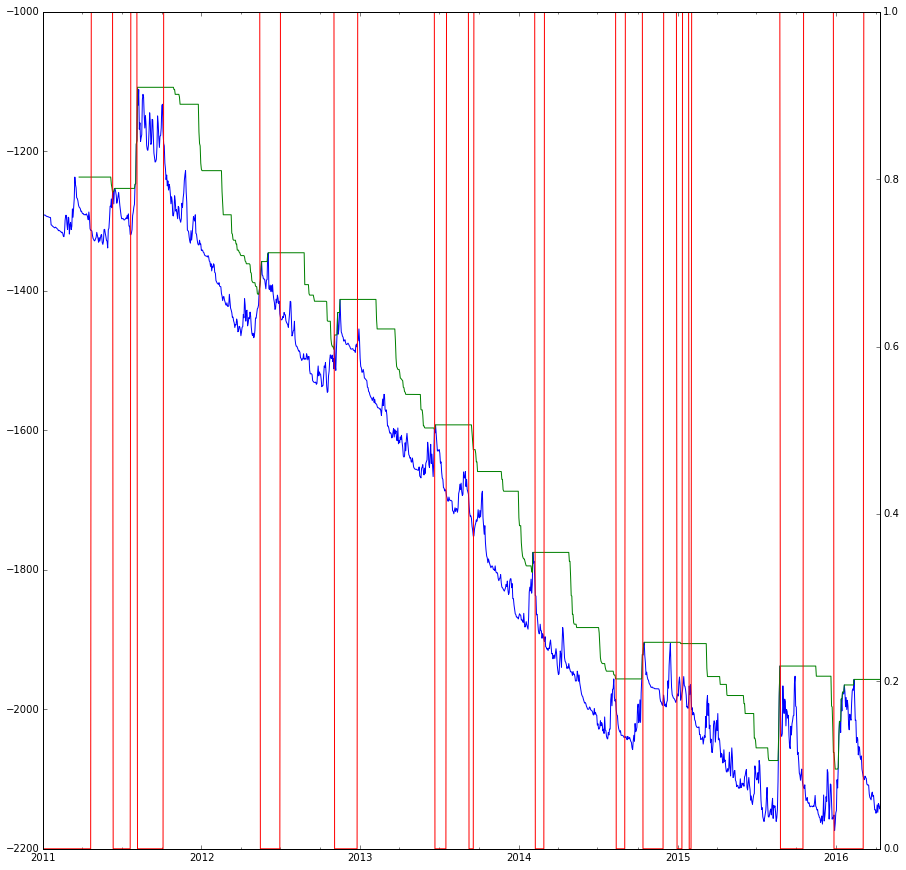

In [20]:
figsize(15, 15)
d.exo.plot()
#slow_ma.plot(c='r')
#fast_ma.plot(c='g')
trailing_stop.plot(c='g')
#short_entry.plot(secondary_y=True)
#short_exit.plot(secondary_y=True)
inposition.plot(secondary_y=True)

# Entry rules

* Enter short when fast MA crosses down slow MA
* Exit when fast MA crosses up slow MA


In [15]:
short_entry = CrossDown(fast_ma, slow_ma)
short_exit = (CrossUp(fast_ma, slow_ma) ) | (CrossUp(d.exo, trailing_stop))

<h1>Backtest results</h2>

In [17]:
direction = -1
pl, inposition = backtester.backtest(d, short_entry, short_exit, direction )
equity, stats = backtester.stats(pl, inposition)

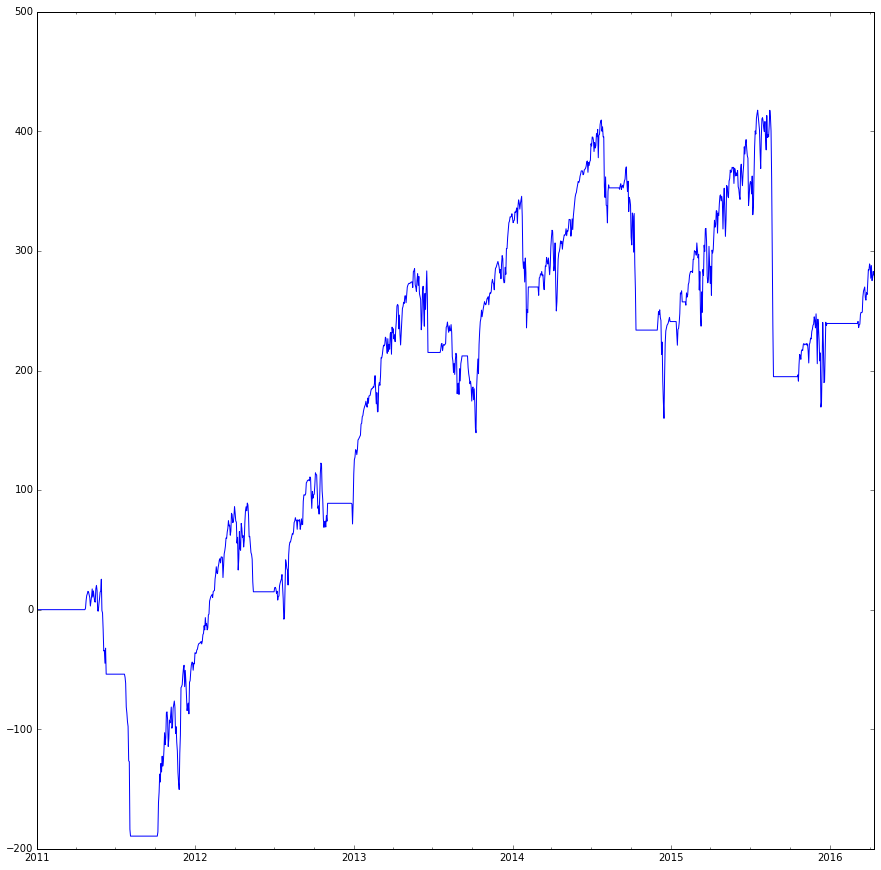

In [21]:
equity.plot()

In [11]:
stats

{'avg': 18.411538461538438,
 'count': 13,
 'maxdd': -249.49999999999977,
 'netprofit': 239.34999999999968,
 'std': 92.223462211351233,
 'winrate': 0.6153846153846154}

In [12]:

date = pl.index
export_dict = {
    'pl': pl,
    'inposition': inposition,    
}

matlab.exportdata('../mat/out/'+strategyname+'_out.mat', date, export_dict)